In [1]:
import matplotlib.pyplot as plt
import numpy as nop

In [37]:
def minimize(f, der_f=None, start_pos=0, l_rate=0.1, eps=10e-8, l_rate_slower= lambda x: 0.5*x):
    if der_f == None:
        der_f = lambda x: (f(x + eps) -f(x) )/eps
    x = start_pos
    min_f = (f(start_pos),0)
    der = der_f(x)
    c_iters = 0 
    log = []
    
    log.append(x)
    
    while abs(der) > eps:
        c_iters +=1
        der = der_f(x)
        x -= l_rate*der
        if f(x) < min_f[0]:
            min_f = f(x), c_iters
            
        if c_iters - min_f[1] > 5:
            l_rate = l_rate_slower(l_rate)
        log.append(x)
    return x, c_iters, log

In [38]:
def SGD(f, init_w, pder_f=None, l_rate=0.1, eps=10e-8, l_rate_slower= lambda x: 0.5*x, max_iters=1000):
    if pder_f == None:
        pder_f = lambda x: (f(x + eps) - f(x)) / eps 
    
    w = init_w
    min_f = (f(init_w),0)
    der = pder_f(w)
    c_iters = 0 
    
    #init logging
    log = []
    log.append(w)
    
    while np.sum(abs(der)) > eps and c_iters < max_iters:
        # updating all weigths
        for i in np.random.choice(len(w),len(w),replace=False):
            der = pder_f(w[i])
            w[i] -= l_rate * der
            
        # check improving
        c_iters += 1
        if f(w) < min_f[0]:
            min_f = f(w), c_iters
        # checl learning rate
        if c_iters - min_f[1] > 10:
            l_rate = l_rate_slower(l_rate)
        #logging
        log.append(w)
    
    return w,log

In [42]:
f1 = lambda x: np.sum(x**2)
w,log = SGD(f1,np.random.uniform(size=2))
print("w: {}, iters: {}".format(w,len(log)))

w: [-1.34149604e-08 -4.62356349e-09], iters: 76


In [2]:
def f(x):
    return x**4 - 4*x
def der_f(x):
    return 4*(x**3) - 4

In [4]:
x_ = np.arange(-5,5,0.1)
y_ = np.vectorize(f)(x)

def draw(x,y):
    plt.plot(x_,y_)
    plt.scatter(x,y)
    plt.show()

0.9999999488359719 13


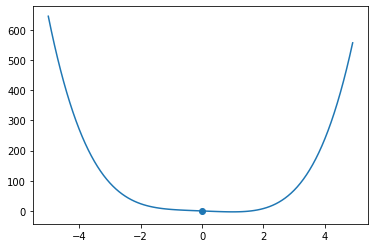

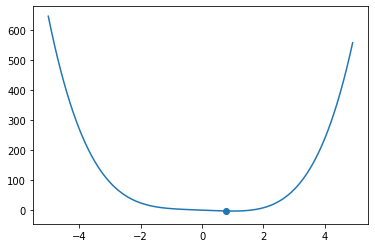

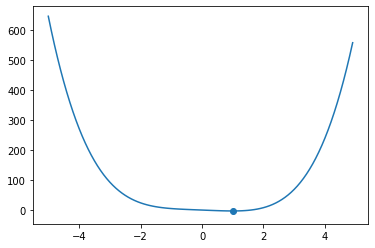

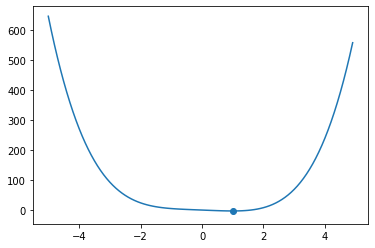

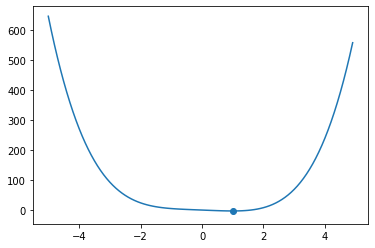

In [38]:
res, c, log = minimize(f,start_pos=0,l_rate=0.1)
print(res,c)
count_p = 5
k = len(log)/count_p
for i in range(count_p):
    draw(log[int(k*i)],f(log[int(k*i)]))

In [7]:
print(log)

[0, 0.4, 0.7744, 0.9886383652863999, 1.0021180095052515, 0.9995710111413065, 1.0000855769655885, 0.9999828758185312, 1.0000034244844107, 0.9999993150890453, 1.000000136981628, 0.9999999726036518, 1.0000000054792688, 0.9999999989041463]


In [98]:
f(0.9)

-2.9439

In [10]:
der_f(4.32)

318.48627200000004

In [34]:
minimize(f,der_f,start_pos=0,l_rate=0.1)[0] - minimize(f,lambda x: (f(x + 10e-8) -f(x) )/10e-8,start_pos=0,l_rate=0.1)[0]

5.006817438424349e-08